## Exploratory Data Analysis - Spotify dataset

<div class="alert alert-block alert-warning">
<b>!</b> The main purpose of these EDAs is to identify what kind of data transformations are needed to manipulate the data in the creation of a Data Pipeline. The transformations evidenced will be tested, they will not be implemented directly from the EDAs.
</div>

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

<div class="alert alert-block alert-info">
<b>NOTE:</b>  "pd.set_option('display.max_columns', 100)" will help us to see all columns of the dataframe when we print it.
</div>

### Data Understanding

#### Let´s read the dataset

In [71]:
df=pd.read_csv("../data/spotify_dataset.csv")
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [72]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

**Column Description:**
 
* *Unnamed: 0* - It's a column that has a sequential id, like the typical pandas id. It seems that it was created by default when I download the data since the dataset as such did not have this column. 
* *track_id* - The Spotify ID for the track.
* *artists* - The names of the artists who performed the track. If there is more than one artist, they are separated by a semicolon
* *album_name* - Name of the album that contains the track, if any.
* *track_name* - Name of the track.
* *popularity* -  The popularity of a track is a value between 0 and 100, with 100 being the most popular.
* *duration_ms* - Track length in milliseconds.
* *explicit* - Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown).
* *danceability* - A value of 0.0 is least danceable and 1.0 is most danceable
* *energy* - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* *key* - The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
* *loudness* - The overall loudness of a track in decibels (dB).
* *mode* - Mode indicates the modality (major or minor) of a track.  Major is represented by 1 and minor is 0.
* *speechiness* - Speechiness indicates the presence of spoken words in a track, with values near 1.0 indicating predominantly spoken content, between 0.33 and 0.66 indicating a mix of music and speech (such as rap), and below 0.33 indicating music or other non-spoken content.
* *acousticness* - A measure of confidence from 0.0 to 1.0 that the track is acoustic. 1.0 represents high confidence that the track is acoustic.
* *instrumentalness* - The closer the Instrumentalness value is to 1.0, the greater the likelihood that the track contains no vocal content.
* *liveness* -  Detects the presence of an audience in the recording. Higher liveness values = increased probability that the track was performed live (0.0 - 1.0 ).
* *valence* - A scale from 0.0 to 1.0. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* *tempo* - The overall estimated tempo of a track in beats per minute (BPM).
* *time_signature* - The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
* *track_genre* - The genre in which the track belongs


 #[1] reference

<div class="alert alert-block alert-info">
<b>NOTE:</b>  If you want more information about the data, 
I recommend to follow the link [1] of the reference, which is the dataset we're using.
</div>

In [73]:
df.shape

(114000, 21)

We can see that with the raw data we have 114000 rows and 21 columns, which were previously described.

In [74]:
df.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

According to the types for each column, in the raw dataframe we got: <br>
6 intergers <br>
1 boolean <br>
9 float <br>
5 object type

In [75]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Here we can see a statistical description of the columns that are of type float or int, since measures such as mean, standard deviation, minimum, maximum and quantiles are taken. This is done to make an analysis of how the data behaves statistically. <br>
For example, in all the columns we can see that the count is 114000, since this is the number of rows we have according to the shape we saw before. <br>
Another example to see how the data of each column behave is to compare them with each other, for example, look at the mode column and the energy column, where although both have a scale between 0 and 1, mode takes only one of these values (0 or 1), and not a value in between, unlike the energy column which, when referring to a percentage measure, takes data in the middle. Energy take 1 as 100% and 0 as 0%, taking values in between as 50%, for example, if it takes a 0.5. That is why I decided to specify what each column refers to at the beginning, since the context is important to know what measures the data takes, like if 1 in mode is the same as 1 in energy.

I'll drop 'Unnamed: 0' because is an unnecessary column for my analysis. As I mentioned in the [Column Description](#column-description) it's a sequential ID and, in my case, is unnecesary.  <br>
This would be a simulation of manipulating the record:

In [76]:

df = df.drop(['Unnamed: 0'], axis=1)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


<div class="alert alert-block alert-info">
<b>NOTE:</b> The actual transformations would be performed when the pipeline is executed in airflow. All other transformations that will be evidenced in the EDAs will be examples/tests of data manipulation and transformations that should be really done in the transformation part of the data pipeline.  </div>

####  Check NA values:

In [77]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Checking wich rows have those NA:

In [78]:
df[df.isna().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Let's verify whether this row has any duplicates to ensure that when we delete it later based on the track_id, we don't accidentally remove other rows that may contain valuable data:

In [79]:
df.query('track_id == "1kR4gIb7nGxHPI3D2ifs59"')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Deleting the row full of NaN values:

In [80]:
df = df.drop(df[df['track_id'] == '1kR4gIb7nGxHPI3D2ifs59'].index, axis=0)

Checking that it has been deleted correctly:

In [81]:
df[df['track_id'] == '1kR4gIb7nGxHPI3D2ifs59']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


It's important to mention that this row is being removed due to its lack of relevant information, such as the artist's name or album. Consequently, there are no significant attributes to associate this track with, apart from generic factors like musical genre, duration, danceability, and others that don't provide useful insights.

#### Check duplicates in all data

In [82]:
df.loc[df.duplicated()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,False,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080,False,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111246,0sSjIvTvd6fUSZZ5rnTPDW,Everything But The Girl,Eden (Deluxe Edition),Another Bridge - 2012 Remaster,26,132826,False,0.480,0.853,0,-6.276,1,0.0734,0.030600,0.000001,0.3200,0.775,85.181,4,trip-hop
111362,2zg3iJW4fK7KZgHOvJU67z,Faithless,Faithless 2.0,Tarantula,21,398152,False,0.622,0.816,6,-11.095,0,0.0483,0.009590,0.578000,0.0991,0.427,136.007,4,trip-hop
111980,46FPub2Fewe7XrgM0smTYI,Morcheeba,Parts of the Process,Undress Me Now,17,203773,False,0.576,0.352,7,-10.773,0,0.0268,0.700000,0.270000,0.1600,0.360,95.484,4,trip-hop
112968,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933,False,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish


In [83]:
track_id_duplicated_row = "2zg3iJW4fK7KZgHOvJU67z"
df.query(f'track_id == "{track_id_duplicated_row}"')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
111318,2zg3iJW4fK7KZgHOvJU67z,Faithless,Faithless 2.0,Tarantula,21,398152,False,0.622,0.816,6,-11.095,0,0.0483,0.00959,0.578,0.0991,0.427,136.007,4,trip-hop
111362,2zg3iJW4fK7KZgHOvJU67z,Faithless,Faithless 2.0,Tarantula,21,398152,False,0.622,0.816,6,-11.095,0,0.0483,0.00959,0.578,0.0991,0.427,136.007,4,trip-hop


Exploring with a subset:

In [84]:
df.loc[df.duplicated(subset='track_id')]

#[2] reference

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.5770,0,-7.544,1,0.0438,0.2380,0.860000,0.0571,0.8430,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9000,11,-3.674,1,0.0499,0.1160,0.000017,0.1190,0.5990,104.655,4,alt-rock
3000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.5210,10,-9.461,1,0.0329,0.0678,0.149000,0.1230,0.3370,85.012,4,alternative
3002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.5680,9,-5.509,0,0.0300,0.0484,0.000417,0.2860,0.3700,93.986,4,alternative
3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.8070,10,-2.810,1,0.0336,0.0495,0.017700,0.1010,0.3980,124.053,4,alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113572,1saXUvvFlAQaefZUFVmhCn,Bethel Music;Paul McClure,We Will Not Be Shaken (Live),Jesus We Love You - Live,53,415079,False,0.253,0.3590,11,-8.482,1,0.0317,0.3100,0.000006,0.3590,0.1150,115.348,3,world-music
113605,1Q5jFp1g2Ns4gBsHRpcqhu,Bethel Music;Jenn Johnson;Michaela Gentile,Simple,In The Ordinary - Spontaneous,50,174971,False,0.490,0.2310,0,-13.968,1,0.0265,0.6070,0.000000,0.0859,0.0904,103.958,4,world-music
113617,71dLJx3qHOTQMTvvoE2dmd,Bethel Music;Amanda Cook,Peace,King of My Heart,48,330840,False,0.515,0.0736,8,-15.492,1,0.0310,0.9750,0.000261,0.0820,0.0684,109.964,4,world-music
113619,6OG5TBCmuTOuWCzSGsETrE,Bethel Music;Brian Johnson;Jenn Johnson,Simple,Simple,48,351236,False,0.624,0.1240,5,-11.191,1,0.0280,0.9170,0.000000,0.1200,0.2060,78.014,4,world-music


With these two commands that show duplicates we can notice that there are 450 duplicates that have all the information 100% the same, however, there are songs duplicated many more times, 459 to be specific (taking into account the amount of duplicated data by the subset= 'track_id'). <br>
Let's analyze why there are duplicate songs and why they don't appear with the first command used. it means "df.loc[df.duplicated()]".

In [85]:
#Checking random track_id from "df.loc[df.duplicated(subset='track_id')]"
df.query('track_id == "7xsirhcgFWOnItsGuBfrv9"')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
4940,7xsirhcgFWOnItsGuBfrv9,Bethel Music;Steffany Gretzinger,For the Sake of the World,Closer,49,413573,False,0.322,0.558,4,-8.321,1,0.0306,0.0596,0.00016,0.102,0.0813,139.92,4,ambient
113641,7xsirhcgFWOnItsGuBfrv9,Bethel Music;Steffany Gretzinger,For the Sake of the World,Closer,49,413573,False,0.322,0.558,4,-8.321,1,0.0306,0.0596,0.00016,0.102,0.0813,139.92,4,world-music


In [86]:

df.query('track_id == "2aibwv5hGXSgw7Yru8IYTO"')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2109,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,alt-rock
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,alt-rock
3259,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,alternative
37216,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,funk
71158,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,metal
91854,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,rock


Notice that not all rows that have the same track_id are duplicated in all the columns, some of them have a different track_genre. <br>
Now I will do a count according to the track_id to see how many times each specific song is duplicated:

In [87]:
group_df=df.groupby(['track_id']).size().reset_index(name='cnt')
group_df.sort_values(by='cnt', ascending=False)

,track_id,cnt
74275,6S3JlDAGk3uu3NtZbPnuhS,9
25739,2Ey6v4Sekh3Z0RUSISRosD,8
31723,2kkvB3RNRzwjFdGhaUA0tz,8
76131,6bzWr3EpSEolVwlbLk58il,7
7396,0e5LcankE0UyJUuCoq1uH2,7
...,...,...
32929,2rIGJgLcBbI7EvHc0vHpHQ,1
32928,2rHfLANXNn5ppnW0jqv8h2,1
32927,2rHX2oJ6sy9knGTBge4A3E,1
32926,2rHJDOPLTw7w5NqrTg3iBb,1


Based on this, I've chosen to manage only one song per track_id randomly, as I aim to avoid duplicate values. Since it's the same song, I want the parameters I intend to measure to be consistent. Therefore, in my new dataset, I've applied a filter to ensure that track_id values are not repeated:

In [88]:
#Let's take the inverse of the duplicates to get a new dataframe without them

df = df.loc[~df.duplicated(subset=['track_id'])].reset_index(drop=True)
df


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
89736,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
89737,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
89738,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Check our new df shape:

In [89]:
df.shape

(89740, 20)

Checking that we have just one track per id:

In [114]:
group_df=df.groupby(['track_id']).size().reset_index(name='cnt')
group_df.sort_values(by='cnt', ascending=False)

,track_id,cnt
0,0000vdREvCVMxbQTkS888c,1
59823,5D0wjc5MIToteDeEMKCk8g,1
59831,5D2cMPwNY9Ftb7vqInLLQK,1
59830,5D2RBWVKgLv4CimNGBUcWS,1
59829,5D2N5cbso4bMxbhrfdqA4a,1
...,...,...
29912,2bHGHbsFmjQdmdE7hZSKr6,1
29911,2bH2audXWKrZXRgCDomrzm,1
29910,2bGm7xy64NrrXyVkLyssFU,1
29909,2bGfiXJK08TgjT3wMasCfV,1


And we can notice that with the same query previously implemented that gave us the song "Snow (Hey Oh)" 9 times but with different musical genre now has only 1 row as it was the idea:

In [90]:
df.query('track_id == "2aibwv5hGXSgw7Yru8IYTO"')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2108,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9,11,-3.674,1,0.0499,0.116,0.000017,0.119,0.599,104.655,4,alt-rock


### Feature Understanding

#### How many different music genres do we have

In [91]:
df['track_genre'].nunique()

113

In [92]:
df.groupby(['track_genre']).size().reset_index(name='cnt')

,track_genre,cnt
0,acoustic,1000
1,afrobeat,999
2,alt-rock,999
3,alternative,407
4,ambient,999
...,...,...
108,techno,416
109,trance,708
110,trip-hop,904
111,turkish,870


Since there are so many, it has been decided to simplify them by grouping into more general musical genres that will later allow an easier handling of the data for the visualizations. I am going to do it by the most known types of genres and "others".

In [93]:
genre_general = {
    'Rock': ['alt-rock', 'alternative', 'hard-rock', 'grunge', 'punk', 'rock', 'rock-n-roll', 'j-rock', 'psych-rock', 'punk-rock'],
    'Metal' : ['hardcore', 'heavy-metal', 'black-metal', 'metal', 'metalcore'],
    'Pop': ['pop', 'power-pop'],
    'Hip-Hop/R&B': ['hip-hop', 'r-n-b', 'trip-hop'],
    'Electronic': ['chicago-house', 'breakbeat', 'dance', 'dancehall', 'deep-house', 'detroit-techno', 'disco', 'edm', 'electro', 'electronic', 'techno', 'trance', 'dubstep', 'minimal-techno'],
    'Latin': ['latin', 'salsa', 'samba', 'reggaeton', 'tango'],
    'Other': [
        'acoustic', 'afrobeat', 'ambient', 'anime', 'bluegrass', 'blues', 'brazil', 'british',
        'cantopop', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'disney', 'drum-and-bass', 'dub', 'emo',
        'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'guitar', 'happy',
         'hardstyle', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial',
        'iranian', 'j-dance', 'j-idol', 'j-pop', 'jazz', 'k-pop', 'kids', 'malay', 'mandopop',
        'mpb', 'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'progressive-house',
        'rockabilly', 'romance', 'sad', 'sertanejo', 'show-tunes', 'singer-songwriter', 'ska', 'sleep', 'soul', 'spanish', 'study',
        'swedish', 'synth-pop', 'techno', 'turkish', 'world-music'
    ]
}

def assign_simplified_genre(genre):
    for category, genre_list in genre_general.items():
        if genre in genre_list:
            return category
    return 'Other'

df['simplified_genre'] = df['track_genre'].apply(assign_simplified_genre)


In [94]:
df['simplified_genre'].nunique()

7

In [95]:
df.groupby(['simplified_genre']).size().reset_index(name='cnt')

,simplified_genre,cnt
0,Electronic,11135
1,Hip-Hop/R&B,2235
2,Latin,3451
3,Metal,3700
4,Other,61770
5,Pop,1307
6,Rock,6142


We can observe a significant reduction in the number of genres after grouping. Notably, the "Others" category encompasses a much broader range of possibilities compared to the other genres, potentially introducing bias due to its greater diversity. This observation underscores the need for thoughtful handling of such diversity in future projects

#### How many artists do we have

In [96]:
df['artists'].value_counts()

artists
George Jones                          260
my little airport                     171
The Beatles                           149
BTS                                   143
Håkan Hellström                       141
                                     ... 
Critical Mass;D-Block & S-te-Fan        1
Klubfiller;Re-Con                       1
Dj Gizmo;The Darkraver                  1
Rotterdam Terror Corps;Mike Redman      1
Jesus Culture                           1
Name: count, Length: 31437, dtype: int64

We can notice that some artist are on a group with more artists separated by semicolon. That could change some results observed in this exploratory data analysis.

Let's divide the artists into primary artists and secondary artists.

In [97]:
df.loc[df['artists'].str.contains(';', na=False)]


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,simplified_genre
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.1200,76.332,4,acoustic,Other
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,-8.822,1,0.0355,0.85700,0.000003,0.0913,0.0765,141.284,3,acoustic,Other
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.414,0,-8.700,1,0.0369,0.29400,0.000000,0.1510,0.6690,130.088,4,acoustic,Other
14,4LbWtBkN82ZRhz9jqzgrb3,Chord Overstreet;Deepend,Hold On (Remix),Hold On - Remix,56,188133,False,0.755,0.780,2,-6.084,1,0.0327,0.12400,0.000028,0.1210,0.3870,120.004,4,acoustic,Other
16,6xKeQgzfjixSUld14qUezm,Andrew Foy;Renee Foy,ily (i love you baby),ily (i love you baby),56,129750,False,0.706,0.112,2,-18.098,1,0.0391,0.82700,0.000004,0.1250,0.4140,110.154,4,acoustic,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89706,42bdU7oDyRvyRXaKbUrtfu,Bethel Music;Bethany Wohrle,Victory (Live),Victory Is Yours - Live,44,333080,False,0.418,0.786,9,-5.257,1,0.0471,0.01050,0.000000,0.3420,0.0656,139.920,4,world-music,Other
89707,1eZYPovTvmxk3QlVD2VpCX,Bethel Music;Brian Johnson,We Will Not Be Shaken (Live),We Will Not Be Shaken - Live,46,332604,False,0.392,0.668,9,-7.342,1,0.0296,0.00356,0.000560,0.5880,0.1150,148.013,4,world-music,Other
89709,7mD7yAQm4GcifSnWqJdZHi,Bethel Music;Molly Skaggs,Victory (Live),Ain’t No Grave - Live,47,493293,False,0.370,0.831,4,-4.484,1,0.0442,0.01290,0.000122,0.1090,0.1850,148.008,4,world-music,Other
89715,2yAo8cJDVoMjBMS5MgrO8P,Hillsong Worship;Hillsong Young & Free,OPEN HEAVEN / River Wild,This Is Living,38,214647,False,0.611,0.857,0,-6.248,0,0.0384,0.00182,0.000000,0.3260,0.4640,128.001,4,world-music,Other


In [98]:
df[['main_artists', 'second_artists']] = df['artists'].str.split(';', n=1, expand=True)

In [99]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,simplified_genre,main_artists,second_artists
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,Other,Gen Hoshino,None
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,Other,Ben Woodward,None
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,Other,Ingrid Michaelson,ZAYN
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,Other,Kina Grannis,None
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,Other,Chord Overstreet,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Other,Rainy Lullaby,None
89736,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Other,Rainy Lullaby,None
89737,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Other,Cesária Evora,None
89738,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Other,Michael W. Smith,None


Checking if we still having artists grouped in the second_artists column:

In [100]:
df.loc[df['second_artists'].str.contains(';', na=False)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,simplified_genre,main_artists,second_artists
151,34dnNAUoIPcwnK0RtVMBWZ,Tyler Ward;Lindsey Stirling;Kina Grannis,"Tyler Ward Covers, Vol. 5",The Scientist,47,276575,False,0.453,0.295,7,-12.881,1,0.0291,0.5180,0.000110,0.2930,0.1400,146.022,4,acoustic,Other,Tyler Ward,Lindsey Stirling;Kina Grannis
172,3ISLwA96mtx13Wx7K1PPPk,Tyler Ward;Karis;Ray Lorraine,Love Story,Love Story,55,232500,False,0.498,0.120,0,-17.721,1,0.0487,0.8510,0.000000,0.1710,0.3380,121.187,4,acoustic,Other,Tyler Ward,Karis;Ray Lorraine
196,6NSlOEEtWlqvEFrjQsry77,The Weepies;Deb Talan;Steve Tannen,Say I Am You,World Spins Madly On,64,165133,False,0.502,0.311,1,-13.421,1,0.0285,0.6170,0.000043,0.1290,0.4000,107.612,4,acoustic,Other,The Weepies,Deb Talan;Steve Tannen
204,3rzRo91l4htQvMXhsiECAX,Todd Carey;Ariza;Chuck Leavell,Higher Love,Higher Love,30,173250,False,0.578,0.763,2,-4.824,1,0.0998,0.0916,0.000003,0.0743,0.3940,96.808,4,acoustic,Other,Todd Carey,Ariza;Chuck Leavell
225,3DyhwZyBFedvnt68fMi6vf,Tyler Ward;Karis;Ray Lorraine,One More Time Around,One More Time Around,47,205666,False,0.429,0.358,0,-9.076,1,0.0346,0.6140,0.000000,0.0875,0.1870,134.279,4,acoustic,Other,Tyler Ward,Karis;Ray Lorraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89598,2pxyd0ly9E5TEObwOvkedv,Passion;Kristian Stanfill;Tasha Cobbs Leonard;...,Burn Bright,What He's Done,47,217651,False,0.361,0.430,1,-8.438,1,0.0451,0.0985,0.000003,0.0736,0.2510,141.802,4,world-music,Other,Passion,Kristian Stanfill;Tasha Cobbs Leonard;Anna Golden
89623,0mhKPUIHNEz4tuWNxNEqCS,Bethel Music;Paul McClure;Hannah McClure,Homecoming (Live),I Belong To Jesus - Live,50,519770,False,0.462,0.613,9,-8.559,1,0.0328,0.2540,0.000077,0.1240,0.2590,133.851,4,world-music,Other,Bethel Music,Paul McClure;Hannah McClure
89656,6ul5bvsJ2Z59kC62nzrmrP,Ruido Blanco Hart;Ondas Alfa;Música de concent...,Chispa Encendida: Flujo De Antorchas,La Calidez Sana Del Agua,21,120000,False,0.229,0.986,10,-21.872,0,0.0577,0.1030,0.042700,0.7160,0.0148,112.275,3,world-music,Other,Ruido Blanco Hart,Ondas Alfa;Música de concentración profunda
89679,1hsbxu82J3uqLyvd5qxhdC,Hillsong Worship;Integrity's Hosanna! Music;Da...,Shout to the Lord (Live),Jesus Lover of My Soul - Live,42,215733,False,0.476,0.396,0,-10.916,1,0.0260,0.3100,0.000000,0.6580,0.1990,72.157,4,world-music,Other,Hillsong Worship,Integrity's Hosanna! Music;Darlene Zschech


Let's handle this creating a new column that would tell by a boolean value if the row still having secondary artists or not (TRUE / FALSE) and another column that would specify how many secondary artists the track have (0, 1, 2, 3... etc)

In [101]:
#Boolean of second_artist
df['has_secondary_artists'] = df['second_artists'].notna()
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,simplified_genre,main_artists,second_artists,has_secondary_artists
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,Other,Gen Hoshino,None,False
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,Other,Ben Woodward,None,False
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,Other,Ingrid Michaelson,ZAYN,True
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,Other,Kina Grannis,None,False
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,Other,Chord Overstreet,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Other,Rainy Lullaby,None,False
89736,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Other,Rainy Lullaby,None,False
89737,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Other,Cesária Evora,None,False
89738,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Other,Michael W. Smith,None,False


In [102]:
#Counting how many second_artists do we have
df['count_second_artists'] = df['second_artists'].apply(lambda x: 0 if pd.isna(x) else x.count(';') + 1)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,simplified_genre,main_artists,second_artists,has_secondary_artists,count_second_artists
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,Other,Gen Hoshino,None,False,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,Other,Ben Woodward,None,False,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,Other,Ingrid Michaelson,ZAYN,True,1
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,Other,Kina Grannis,None,False,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,Other,Chord Overstreet,None,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Other,Rainy Lullaby,None,False,0
89736,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Other,Rainy Lullaby,None,False,0
89737,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Other,Cesária Evora,None,False,0
89738,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Other,Michael W. Smith,None,False,0


After all these changes, I would drop the columns "artist" and "second_artists" because they won't be useful from this point on.

In [103]:
df = df.drop(['artists'], axis=1)

In [104]:
df = df.drop(['second_artists'], axis=1)

In [116]:
df.shape

(89740, 23)

#### FEATURE RELATIONSHIPS

In [105]:
df

,track_id,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,simplified_genre,main_artists,has_secondary_artists,count_second_artists
0,5SuOikwiRyPMVoIQDJUgSV,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,Other,Gen Hoshino,False,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,Other,Ben Woodward,False,0
2,1iJBSr7s7jYXzM8EGcbK5b,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,Other,Ingrid Michaelson,True,1
3,6lfxq3CG4xtTiEg7opyCyx,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,Other,Kina Grannis,False,0
4,5vjLSffimiIP26QG5WcN2K,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,Other,Chord Overstreet,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,2C3TZjDRiAzdyViavDJ217,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Other,Rainy Lullaby,False,0
89736,1hIz5L4IB9hN3WRYPOCGPw,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Other,Rainy Lullaby,False,0
89737,6x8ZfSoqDjuNa5SVP5QjvX,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Other,Cesária Evora,False,0
89738,2e6sXL2bYv4bSz6VTdnfLs,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Other,Michael W. Smith,False,0


#### Let´s see correlations between variables

<div class="alert alert-block alert-info">
<b>NOTE:</b>  The correlations for this case we will analyze only with the numerical values, since the analysis of categorical and numerical variables requires different methods, of which I have no deep knowledge yet, so to be on the safe side we will analyze the numerical variables to see the correlation between them. 
</div>

In [115]:
df.dtypes

track_id                  object
album_name                object
track_name                object
popularity                 int64
duration_ms                int64
explicit                    bool
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                       int64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
time_signature             int64
track_genre               object
simplified_genre          object
main_artists              object
has_secondary_artists       bool
count_second_artists       int64
dtype: object

Remembering what are the data types of each column to know which ones to take in the new df for correlations.

In [107]:
df_numerical = df[['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
df_numerical


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
89736,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
89737,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
89738,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


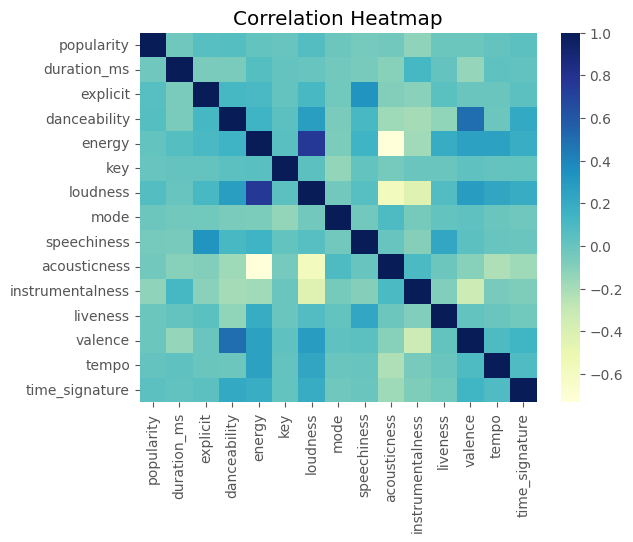

In [123]:
sns.heatmap(df_numerical.corr(), cmap="YlGnBu") 
plt.title("Correlation Heatmap")
plt.show()

# [5] reference

This correlation map illustrates relationships among numerical variables in the DataFrame. Strong correlations appear as dark blue squares, while weaker ones are depicted in light yellow, as indicated by the color scale on the right. For instance, there is a strong positive correlation between energy and loudness, whereas energy and acousticness exhibit a negative correlation.

We can also see the coefficients of variability where those that tend to 1 means that the variables have high correlation and those that tend to -1 vice versa, have very little correlation (as well as indicated by the color scale of the heatmap where light yellows are negative correlations and dark blue are strong and positive correlations).

In [124]:
df_numerical.corr()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.023157,0.054898,0.064275,0.013725,0.003441,0.071674,-0.016238,-0.047086,-0.038828,-0.127477,-0.013857,-0.011508,0.007280,0.036898
duration_ms,-0.023157,1.000000,-0.065373,-0.064139,0.063258,0.011297,0.000360,-0.039378,-0.060751,-0.108478,0.117372,0.008109,-0.147018,0.026004,0.022608
explicit,0.054898,-0.065373,1.000000,0.119115,0.100696,0.006634,0.109048,-0.033853,0.328201,-0.091508,-0.112077,0.041329,-0.002709,-0.004070,0.037128
danceability,0.064275,-0.064139,0.119115,1.000000,0.143913,0.035116,0.271838,-0.062639,0.109519,-0.177040,-0.194750,-0.132237,0.492578,-0.021329,0.210043
energy,0.013725,0.063258,0.100696,0.143913,1.000000,0.046335,0.758774,-0.075018,0.141332,-0.732569,-0.181038,0.188940,0.256317,0.258629,0.186534
key,0.003441,0.011297,0.006634,0.035116,0.046335,1.000000,0.035903,-0.142090,0.017761,-0.045165,-0.005281,-0.002580,0.026253,0.008272,0.014800
loudness,0.071674,0.000360,0.109048,0.271838,0.758774,0.035903,1.000000,-0.037111,0.055295,-0.582664,-0.434719,0.077238,0.289095,0.228660,0.193695
mode,-0.016238,-0.039378,-0.033853,-0.062639,-0.075018,-0.142090,-0.037111,1.000000,-0.040802,0.091038,-0.052588,0.016766,0.025583,-0.001895,-0.023900
speechiness,-0.047086,-0.060751,0.328201,0.109519,0.141332,0.017761,0.055295,-0.040802,1.000000,0.005124,-0.099659,0.225100,0.032935,0.004033,-0.006198
acousticness,-0.038828,-0.108478,-0.091508,-0.177040,-0.732569,-0.045165,-0.582664,0.091038,0.005124,1.000000,0.096072,-0.019073,-0.103781,-0.220252,-0.174057


Now, to see the correlation between two variables and to see the behavior between some of them, we take a sample of the data to make the visualization clearer. If we take all the data, we won't be able to visualize the next plots as well as should.

In [109]:
sample = df.sample(int(0.005 * len(df)))
sample

,track_id,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,simplified_genre,main_artists,has_secondary_artists,count_second_artists
5491,4ZSMuhXGEOniQlBI6Nns5D,Krebskollektion,Blutgeil,24,258680,False,0.386,0.882,0,-5.546,1,0.0434,0.000116,0.003170,0.3260,0.7570,142.817,4,black-metal,Metal,Eisregen,False,0
78395,1U6nlCjzE08CrfxufRo1Bc,A Little Night Music (Original Broadway Cast R...,A Little Night Music: A Weekend in the Country,22,400493,False,0.560,0.396,5,-10.270,1,0.0825,0.931000,0.000000,0.1530,0.6040,113.565,4,show-tunes,Other,Stephen Sondheim,True,2
40189,2jBnOLpZO2aCgbGgjXvBgo,Powell & Pratt,Rosa Flor,27,178390,False,0.520,0.577,4,-12.895,0,0.0330,0.062900,0.001480,0.1340,0.8910,100.338,4,guitar,Other,Baden Powell,True,1
19369,1QuEakfDCo0mHPBN02KYQ7,Halloween Songs | Witches Hour,Massacre,3,206815,False,0.503,0.506,0,-7.554,0,0.0332,0.098900,0.000000,0.3520,0.1100,89.888,4,dance,Electronic,Kim Petras,False,0
74170,6R0TQQtu4guq2l4p4LIuuC,"Romansy: Gori, gori, moja zvezda…",Svidanie,0,196204,False,0.290,0.306,10,-9.223,0,0.0530,0.986000,0.000004,0.1080,0.0618,76.443,4,romance,Other,Sergei Lemeshev,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23950,42aUvJt7Att3m2FeqvtxbH,Fara lacrimi,Stay With Me,38,249186,False,0.691,0.819,0,-6.291,1,0.0425,0.050000,0.000255,0.2730,0.4910,128.006,4,disco,Electronic,Akcent,False,0
16257,42wY7uB3WafeqwEcXvxZGu,Bananas,Discrete,40,159408,False,0.642,0.747,7,-8.064,1,0.0500,0.000263,0.726000,0.1240,0.3840,114.985,4,club,Other,Noisecream,False,0
59896,3ate1F9BHMzHwd7oWenQfN,Just for You,It's Real,22,278506,False,0.572,0.601,10,-7.411,1,0.0321,0.219000,0.000000,0.1190,0.3460,139.986,4,mandopop,Other,Olivia Ong,False,0
58357,0yJVBJeZevYxwI8QJLx3nh,Rabbit & Friendz III (Special Edition),Boss,36,194503,False,0.738,0.900,1,-3.269,1,0.0424,0.009620,0.000000,0.2600,0.1920,99.931,4,malay,Other,Havoc Mathan,True,2


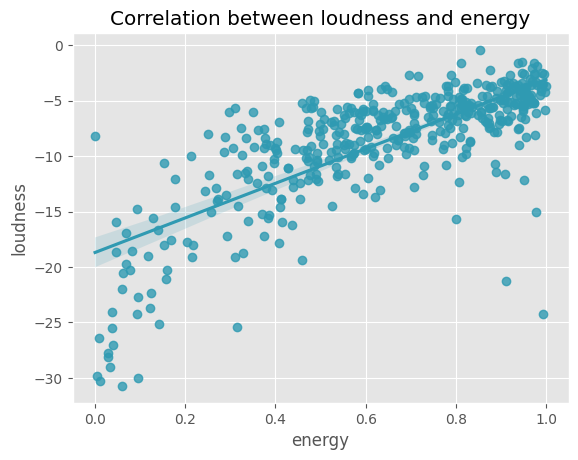

In [110]:
sns.regplot(data=sample, y="loudness", x="energy", color="#2F9AB2")
plt.title("Correlation between loudness and energy")
plt.show()


As the previously mentioned example, we can see the relationship between energy and loudness, where they have a positive correlation (greater than 0), so the variables are associated in a direct sense. That is to say, they can be directly proportional, the higher the energy, the higher the loudness for example.

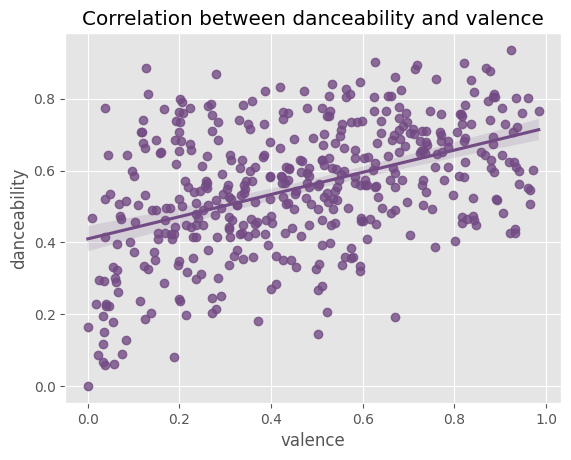

In [111]:

sns.regplot(data=sample, y="danceability", x="valence", color="#734B84")
plt.title("Correlation between danceability and valence")
plt.show()



Examining the correlation between valence and danceability, we observe a positive relationship where the variables are directly proportional. However, this correlation is not as strong as the one between energy and loudness, as evident from the more dispersed data points resembling a cloud. It's important to note the color gradient in the Correlation Heatmap, which displays a correlation but in a lighter shade of blue, signifying a lower correlation compared to the previous example.

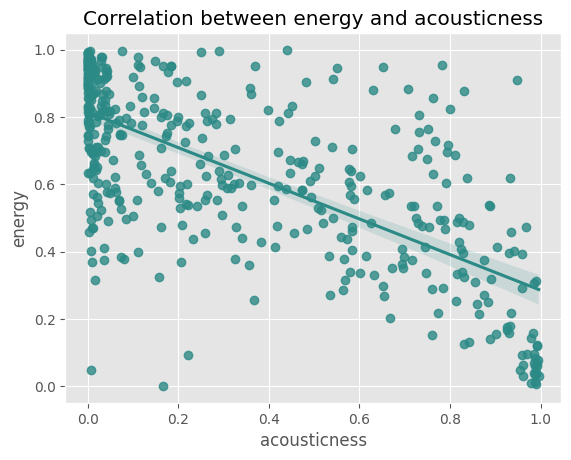

In [112]:
sns.regplot(data=sample, y="energy", x="acousticness", color="#2C8A86")
plt.title("Correlation between energy and acousticness")
plt.show()


In this last example we take an inverse relationship observed in the heatmap where effectively this graph shows that the correlation between acousticness and energy is negative, i.e., they are inversely associated, so they are inversely proportional.

#### Dropping columns that I wouldn't use in my analysis

In [118]:
df.drop(['mode', 'key'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [119]:
df.columns

Index(['track_id', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'track_genre', 'simplified_genre', 'main_artists',
       'has_secondary_artists', 'count_second_artists'],
      dtype='object')

In [113]:
df.shape

(89740, 23)

## References
For the paticular EDAs I took the example of the following links:

[1] MaharshiPandya. (2022). 🎹 Spotify Tracks Dataset. Kaggle.com. __https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data__

[2] Mulla, R. (2021). Exploratory Data Analysis with Pandas Python 2023 [YouTube Video]. In *YouTube*. __https://www.youtube.com/watch?v=xi0vhXFPegw__

[3] How to Plot a DataFrame using Pandas – Data to Fish. (2022). Datatofish.com. __https://datatofish.com/plot-dataframe-pandas/__

‌[4] seaborn.scatterplot — seaborn 0.12.2 documentation. (2022). Pydata.org. __https://seaborn.pydata.org/generated/seaborn.scatterplot.html__

‌[5] How to create a seaborn correlation heatmap in Python. (2020, November 9). GeeksforGeeks; GeeksforGeeks. __https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/__

[6] Fontes, R. (2020). Grammy Awards. Kaggle.com. __https://www.kaggle.com/datasets/unanimad/grammy-awards/data__

[7] Zach. (2021, July 20). How to Create a Pie Chart in Seaborn - Statology. Statology. __https://www.statology.org/seaborn-pie-chart/__

[8] Maina, S. (2022, November 9). Regular Expressions (Regex) with Examples in Python and Pandas. Medium; Towards Data Science. __https://towardsdatascience.com/regular-expressions-regex-with-examples-in-python-and-pandas-461228335670__